In [11]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [12]:
data = pd.read_csv('churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [13]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

### Segregating variables - Dependent & Independent 

In [14]:
#seperating independent and dependent variables

data_x = data.drop(['churn'], axis=1)
data_y = data['churn']

#### Scaling the data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, random_state=56)

# Standardize features
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)


### Implementing Decesion Tree

Q1: __Fill the correct values to implement Decision Tree and find out accuracy, precision, and recall for Test Set__?

In [23]:
#importing Decision tree and metric accuracy score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,precision_score, recall_score

# Creating instance of Tree

tree =  DecisionTreeClassifier(random_state=42)

# Fitting the model
tree.fit(train_x,train_y)

# Predicting over the Test Set and accuracy-score
test_predict = tree.predict(test_x)
k = accuracy_score(test_y,test_predict)
print('Test accuracy_score    ', k)
k = precision_score(test_y,test_predict)
print('Test precision_score    ', k)
k = recall_score(test_y,test_predict)
print('Test recall_score    ', k)

Test accuracy_score     0.7656334964654704
Test precision_score     0.4255832662912309
Test recall_score     0.47743682310469315


Q2: __Fill the correct values for getting Train and Test set accuracy by implementing Decision Tree with the depth range as 3-30?__

In [25]:
dp_list = range(3,31)
train = []
test = []

for depth in dp_list:
    tree =  DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(train_x,train_y)
    prediction = tree.predict(test_x)
    train_pred = tree.predict(train_x)
    train_acc = accuracy_score(train_y,train_pred)
    test_acc = accuracy_score(test_y,prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'max_depth':dp_list,'Train_acc':train,'Test_acc':test})


performance

,max_depth,Train_acc,Test_acc
0,3,0.842961,0.833424
1,4,0.850634,0.842306
2,5,0.858248,0.839043
3,6,0.864834,0.837593
4,7,0.873535,0.836324
5,8,0.882477,0.831974
6,9,0.896495,0.827442
7,10,0.908097,0.827624
8,11,0.920121,0.825267
9,12,0.930091,0.819105


Q3: __Plot the train and test set accuracy after implementing Decision Tree with the depth range as 3-30?__

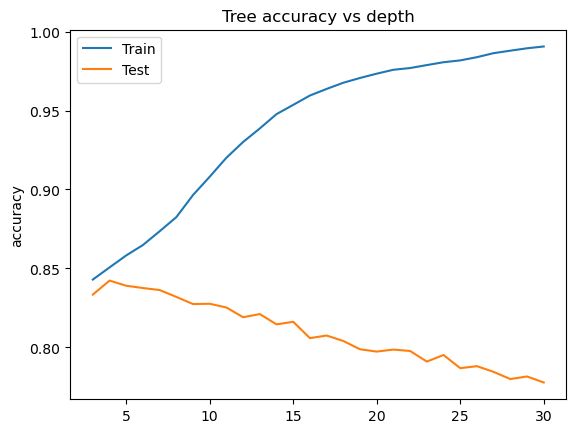

In [29]:
plt.plot(dp_list,train, label='Train')
plt.plot(dp_list,test, label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs depth')
plt.show()

Q4: __Implement Decision Tree with the mimimum sample leaf as 1-30 and plot the Train and Test set accuracy  ?__

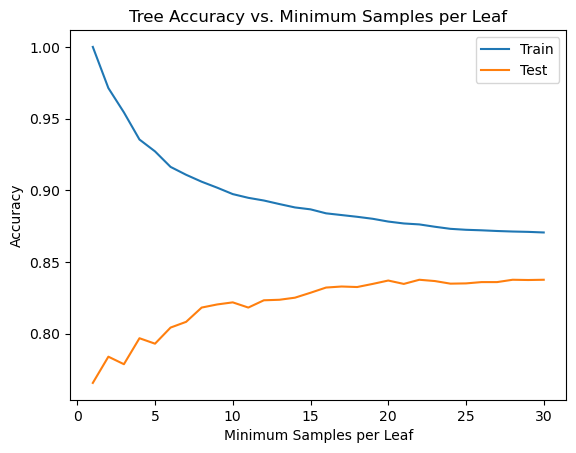

In [30]:
sam_list = range(1, 31)


train_acc_list = []
test_acc_list = []

for sam in sam_list:
    tree = DecisionTreeClassifier(min_samples_leaf=sam, random_state=42)
    tree.fit(train_x, train_y)
    train_pred = tree.predict(train_x)
    test_pred = tree.predict(test_x)
    train_acc = accuracy_score(train_y, train_pred)
    test_acc = accuracy_score(test_y, test_pred)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
performance = pd.DataFrame({'min_samples_leaf': sam_list,
                            'Train_acc': train_acc_list,
                            'Test_acc': test_acc_list})

# Plotting the Train and Test set accuracy vs. minimum samples per leaf
plt.plot(sam_list, train_acc_list, label='Train')
plt.plot(sam_list, test_acc_list, label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Minimum Samples per Leaf')
plt.title('Tree Accuracy vs. Minimum Samples per Leaf')
plt.show()



Q5: __Implement Decision Tree with the mimimum sample split as all even numbers between 2 and 40 and plot the Train and Test set accuracy  ?__

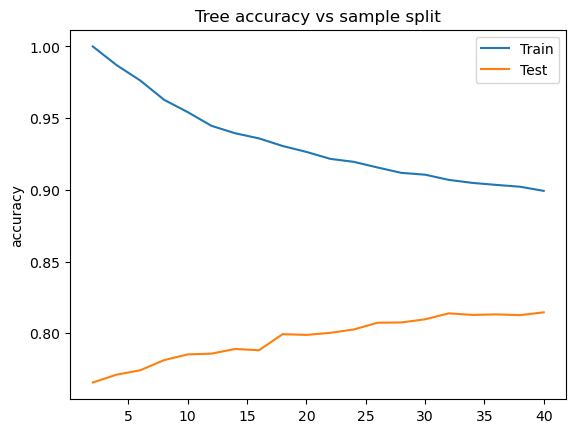

In [32]:
sam_list = range(2, 41, 2)


train_acc_list = []
test_acc_list = []


for sam in sam_list:
    
    tree = DecisionTreeClassifier(min_samples_split=sam, random_state=42)
    tree.fit(train_x, train_y)
    train_pred = tree.predict(train_x)
    test_pred = tree.predict(test_x)
    train_acc = accuracy_score(train_y, train_pred)
    test_acc = accuracy_score(test_y, test_pred)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)


performance = pd.DataFrame({'min_samples_split': sam_list,
                            'Train_acc': train_acc_list,
                            'Test_acc': test_acc_list})

plt.plot(sam_list, train_acc_list, label='Train')
plt.plot(sam_list, test_acc_list, label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs sample split')
plt.show()


Q6: __Implement a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.__

In [33]:
# a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.

from sklearn.model_selection import StratifiedKFold


i = 1 
kf = StratifiedKFold(n_splits=5, random_state=3, shuffle=True) 
accuracy_list = []

for train_index, test_index in kf.split(data_x, data_y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))   
    xtr, xvl = data_x.loc[train_index], data_x.loc[test_index]     
    ytr, yvl = data_y[train_index], data_y[test_index]         
    model = DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl, pred_test) 
    accuracy_list.append(score)
    print('accuracy_score', score)     
    i += 1
    
print("Mean accuracy across the folds is:", sum(accuracy_list)/len(accuracy_list))
    


1 of kfold 5
accuracy_score 0.771635704576348

2 of kfold 5
accuracy_score 0.7673312188491165

3 of kfold 5
accuracy_score 0.7795150691139814

4 of kfold 5
accuracy_score 0.7799682755495128

5 of kfold 5
accuracy_score 0.7697711307500567
Mean accuracy across the folds is: 0.7736442797678029
